In [1]:
from sklearn import datasets
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from datetime import timedelta
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import array
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
plt.style.use('seaborn')
import datetime
%matplotlib inline
from scipy.stats import spearmanr
import os

## The first dataset <br>

The first dataset we are going to create (covid) provides live data regarding the spread of Covid-19. This would allow us to look into the spread of the virus respective to various countries along with a timeline of the spreading.

In [2]:
covid_data_url = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid = pd.read_csv(covid_data_url)

In [3]:
covid.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
146,NaN,Latvia,56.879600,24.603200,0,0,0,0,0,0,...,1065,1066,1066,1071,1079,1082,1085,1086,1088,1088
242,NaN,Mali,17.570692,-3.996166,0,0,0,0,0,0,...,1250,1265,1315,1351,1386,1461,1485,1523,1533,1547
132,NaN,Indonesia,-0.789300,113.921300,0,0,0,0,0,0,...,25773,26473,26940,27549,28233,28818,29521,30514,31186,32033
235,NaN,Syria,34.802075,38.996815,0,0,0,0,0,0,...,122,122,123,123,123,124,124,125,141,144
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,4739,5087,5336,5586,5760,6154,6485,6792,7055,7502
186,NaN,Romania,45.943200,24.966800,0,0,0,0,0,0,...,19133,19257,19398,19517,19669,19907,20103,20290,20479,20604
203,NaN,Sudan,12.862800,30.217600,0,0,0,0,0,0,...,4800,5026,5173,5310,5499,5714,5865,6081,6081,6242
258,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
233,NaN,Grenada,12.116500,-61.679000,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
142,NaN,Kenya,-0.023600,37.906200,0,0,0,0,0,0,...,1888,1962,2021,2093,2216,2340,2474,2600,2767,2872


For the analysis we want to do we'll look at data specifically for countries only, so our first operation on the data frame would be to combine all of the rows for countries like Australia that are split into states. We will then drop the non-numeric columns to leave just the numbers on each day for each country. We will do this to make a new dataframe containing just the numerical data.

In [4]:
grouped = covid.groupby('Country/Region').sum()
grouped = grouped.drop(columns=['Lat', 'Long'])
grouped.sample(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Jamaica,0,0,0,0,0,0,0,0,0,0,...,581,586,588,590,591,591,595,596,598,599
Ethiopia,0,0,0,0,0,0,0,0,0,0,...,1063,1172,1257,1344,1486,1636,1805,1934,2020,2156
Malaysia,0,0,0,3,4,4,4,7,8,8,...,7762,7819,7857,7877,7970,8247,8266,8303,8322,8329
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,84128,84146,84154,84161,84160,84171,84177,84186,84191,84195
Sudan,0,0,0,0,0,0,0,0,0,0,...,4800,5026,5173,5310,5499,5714,5865,6081,6081,6242
Mauritania,0,0,0,0,0,0,0,0,0,0,...,483,530,588,668,745,784,883,947,1049,1104
Mauritius,0,0,0,0,0,0,0,0,0,0,...,335,335,335,335,335,335,337,337,337,337
Israel,0,0,0,0,0,0,0,0,0,0,...,17012,17071,17169,17285,17377,17495,17562,17752,17863,18032
Togo,0,0,0,0,0,0,0,0,0,0,...,433,442,443,445,452,465,485,487,495,497


It can be seen that all the states are combined into countries to be created as labels using the groupby method. The excess numerical values like latitude and longitude are dropped from the table, so that the rate of increase of the confirmed cases can be easily determined for any given country. <br>

We can now select just the data for one country since the new dataframe has the grouped values (Countries) as the row labels. This would demonstrate the exponential rise in case numbers over time.


In [5]:
grouped.loc['China']

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
6/4/20     84171
6/5/20     84177
6/6/20     84186
6/7/20     84191
6/8/20     84195
Name: China, Length: 139, dtype: int64

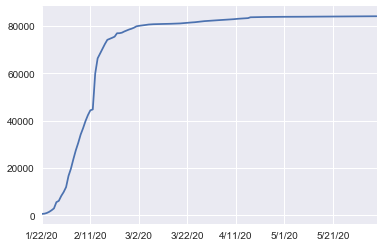

In [6]:
grouped.loc['China'].plot()

In [7]:
grouped.loc['US']

1/22/20          1
1/23/20          1
1/24/20          2
1/25/20          2
1/26/20          5
            ...   
6/4/20     1872660
6/5/20     1897380
6/6/20     1920061
6/7/20     1943647
6/8/20     1960897
Name: US, Length: 139, dtype: int64

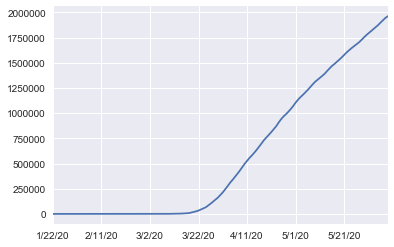

In [8]:
grouped.loc['US'].plot()

Using the loc method, the confirmed cases data for China was singled out. Combined with the plot function, the data was represented in a graph, where the y-axis represents the number of confirmed cases and the x-axis represents the corresponding dates. Initially a rapid exponential rise could be seen in the amount of confirmed cases, with a sudden flattening of the curve.

### Different patterns in different countries

One of the classic displays in the news is the comparison between countries.  We are going to select a number of countries and plot their data on the same graph to reproduce this visualisation. We would do this for countries with significant outbreaks, such as - China, Spain, Italy, UK, Australia and the US. 

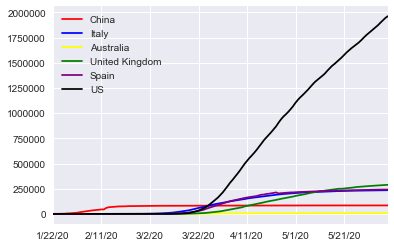

In [9]:
grouped.loc['China'].plot(color = 'red')
grouped.loc['Italy'].plot(color = 'blue')
grouped.loc['Australia'].plot(color = 'yellow')
grouped.loc['United Kingdom'].plot(color = 'green')
grouped.loc['Spain'].plot(color = 'purple')
grouped.loc['US'].plot(color = 'black')
plt.legend()

Plotting the data of different countries on the same graph gives us a visualisation of the different patterns of spread of the virus for each country. It can be seen from the plot that while China had the greatest rise in the number of confirmed cases initially, the rate eventually flattened out. However, in the US, The case can be seen to be just the opposite. The cases were nil initially and from after the 22nd of March and onwards the numbers kept rising at a much higher rate than all the other countries in the comparison plot and the number reached to about 1900000 confirmed cases to date. For Italy, UK and Spain, number of confirmed cases were nil initially, and the outbreak started sometime between 2nd and 22nd March for these countries, with UK having more than 250000 confirmed cases according to latest intel. Australia has the lowest number of confirmed cases among these countries to date. 

<br><br>
## The second dataset

The next dataset that we're going to create contains much more variables (columns) regarding the spread of Covid-19 for us to look into, which would provide some much needed insights for our analysis.

In [10]:
covid_2 = pd.read_csv('latest-covid-data.csv', index_col='date', parse_dates=True)
covid_2.sample(10)

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2020-04-14,GHA,Ghana,566,0,8,0,18.215,0.000,0.257,0.000,...,3.385,1.948,4227.630,12.0,298.245,4.97,0.3,7.7,41.047,0.90
2020-01-29,TWN,Taiwan,8,1,0,0,0.336,0.042,0.000,0.000,...,NaN,8.353,NaN,NaN,103.957,NaN,NaN,NaN,NaN,NaN
2020-05-12,LTU,Lithuania,1485,6,50,0,545.496,2.204,18.367,0.000,...,19.002,13.778,29524.265,0.7,342.989,3.67,21.3,38.0,NaN,6.56
2020-01-13,PHL,Philippines,0,0,0,0,0.000,0.000,0.000,0.000,...,4.803,2.661,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.00
2020-03-20,GRC,Greece,464,46,5,0,44.517,4.413,0.480,0.000,...,20.396,14.524,24574.382,1.5,175.695,4.55,35.3,52.0,NaN,4.21
2020-03-28,DZA,Algeria,409,42,26,1,9.327,0.958,0.593,0.023,...,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90
2020-04-27,ZAF,South Africa,4546,185,87,1,76.650,3.119,1.467,0.017,...,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32
2020-05-06,SAU,Saudi Arabia,30251,1595,200,9,868.935,45.815,5.745,0.259,...,3.295,1.845,49045.411,NaN,259.538,17.72,1.8,25.4,NaN,2.70
2020-04-05,TUR,Turkey,23934,3013,501,76,283.783,35.725,5.940,0.901,...,8.153,5.061,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81


In [11]:
covid_2.iloc[50:]

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2020-05-12,ABW,Aruba,101,0,3,0,945.994,0.0,28.099,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2020-05-13,ABW,Aruba,101,0,3,0,945.994,0.0,28.099,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2019-12-31,AFG,Afghanistan,0,0,0,0,0.000,0.0,0.000,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2020-01-01,AFG,Afghanistan,0,0,0,0,0.000,0.0,0.000,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2020-01-02,AFG,Afghanistan,0,0,0,0,0.000,0.0,0.000,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28,NaN,International,705,0,4,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,International,705,0,6,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-01,NaN,International,705,0,6,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
list(covid_2)

['iso_code',
 'location',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'tests_units',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cvd_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_100k']

In [13]:
covid_2.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
count,1.701300e+04,17013.000000,17013.000000,17013.000000,16702.000000,16702.000000,16702.000000,16702.00000,4.373000e+03,3933.000000,...,15330.000000,15457.000000,15339.000000,10226.000000,15565.000000,16026.000000,12825.000000,12694.000000,6635.000000,14452.000000
mean,1.385970e+04,496.449421,921.158408,34.270146,400.120144,12.613424,17.277248,0.58117,1.820378e+05,8576.114671,...,10.034716,6.405422,23703.435912,9.485498,242.872046,8.005487,11.486775,32.605343,56.447191,3.268021
std,1.447403e+05,4548.080626,10095.894388,335.660941,1276.912285,65.252403,82.467312,3.74209,6.212646e+05,27316.957960,...,6.509705,4.481464,21514.157174,16.964675,119.450935,4.007010,10.598097,13.150072,30.686063,2.631850
min,0.000000e+00,-2461.000000,0.000000,-6.000000,0.000000,-265.189000,0.000000,-1.03600,1.000000e+00,1.000000,...,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000
25%,3.000000e+00,0.000000,0.000000,0.000000,0.224000,0.000000,0.000000,0.00000,6.324000e+03,475.000000,...,4.120000,2.385000,7423.808000,0.500000,141.171000,5.310000,1.900000,21.400000,24.651000,1.400000
50%,5.900000e+01,2.000000,1.000000,0.000000,14.910000,0.173500,0.050500,0.00000,3.330300e+04,1699.000000,...,8.001000,5.060000,16277.671000,1.500000,228.467000,7.110000,7.100000,31.400000,60.130000,2.600000
75%,8.220000e+02,37.000000,17.000000,1.000000,194.585500,4.883000,2.750000,0.03600,1.202850e+05,5640.000000,...,15.413000,10.068000,36085.843000,7.100000,310.496000,10.080000,20.000000,40.800000,84.169000,4.280000
max,4.223047e+06,101533.000000,291519.000000,10520.000000,18798.986000,4944.376000,1208.085000,200.04000,9.348458e+06,388296.000000,...,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000


We will now replace the NaN values of the corona dataset with 0.

In [14]:
covid_2.fillna(0)

,iso_code,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,ABW,Aruba,2,2,0,0,18.733,18.733,0.0,0.0,...,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
2020-03-20,ABW,Aruba,4,2,0,0,37.465,18.733,0.0,0.0,...,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
2020-03-24,ABW,Aruba,12,8,0,0,112.395,74.930,0.0,0.0,...,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
2020-03-25,ABW,Aruba,17,5,0,0,159.227,46.831,0.0,0.0,...,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
2020-03-26,ABW,Aruba,19,2,0,0,177.959,18.733,0.0,0.0,...,13.085,7.452,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28,0,International,705,0,4,0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2020-02-29,0,International,705,0,6,2,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0
2020-03-01,0,International,705,0,6,0,0.000,0.000,0.0,0.0,...,0.000,0.000,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [15]:
iso=covid_2.groupby('iso_code').sum()

In [16]:
iso=iso.drop(['total_cases','total_deaths','total_cases_per_million','total_deaths_per_million','total_tests','total_tests_per_thousand'], axis=1)

In [17]:
iso

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,new_tests,new_tests_per_thousand,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
iso_code,,,,,,,,,,,,,,,,,,,
ABW,101,3,945.994,28.098,0.0,0.000,5.551832e+06,30409.600,2142.4,680.420,387.504,1870636.612,0.0,0.000,604.24,0.0,0.0,0.000,0.00
AFG,4967,127,127.594,3.262,0.0,0.000,4.866043e+09,6802.750,2325.0,322.625,167.125,225498.375,0.0,74628.625,1198.75,0.0,0.0,4718.250,62.50
AGO,45,2,1.367,0.061,0.0,0.000,1.741912e+09,1266.170,890.4,127.465,72.186,308433.235,0.0,14630.385,208.82,0.0,0.0,1413.192,0.00
AIA,3,0,199.974,0.000,0.0,0.000,7.200960e+05,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00
ALB,876,31,304.395,10.764,0.0,0.000,1.899348e+08,6921.486,2508.0,870.408,570.438,779026.446,72.6,20076.870,665.28,468.6,3379.2,0.000,190.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,288,0,2.957,0.000,62378.0,0.640,1.304337e+10,41289.018,4368.4,958.100,632.212,827032.456,268.0,32892.310,804.00,134.0,6150.6,11503.498,348.40
YEM,67,11,2.249,0.371,0.0,0.000,1.014083e+09,1819.272,690.2,99.348,53.822,50290.998,639.2,16830.102,181.90,258.4,992.8,1684.428,23.80
ZAF,11350,206,191.369,3.477,358492.0,6.045,4.685387e+09,3693.566,2156.7,422.176,241.187,971295.204,1493.1,15830.020,436.08,639.9,2622.8,3475.447,183.28


In [18]:
grouped_2 = covid_2.groupby('location').sum()

In [19]:
list(grouped_2)

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cvd_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_100k']

In [20]:
grouped_2

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,70317,4967,2088,127,1806.325,127.594,53.639,3.262,0.0,0.0,...,322.625,167.125,225498.375,0.0,74628.625,1198.75,0.00,0.000,4718.250,62.500
Albania,27856,876,1195,31,9679.617,304.395,415.243,10.764,0.0,0.0,...,870.408,570.438,779026.446,72.6,20076.870,665.28,468.60,3379.200,0.000,190.740
Algeria,135473,6067,15268,515,3089.391,138.359,348.178,11.745,0.0,0.0,...,807.430,501.410,1808799.070,65.0,36187.320,874.90,91.00,3952.000,10886.330,247.000
Andorra,30959,758,1509,48,400685.952,9810.387,19530.191,621.229,0.0,0.0,...,0.000,0.000,0.000,0.0,6657.235,486.17,1769.00,2305.800,0.000,0.000
Angola,1105,45,90,2,33.619,1.367,2.745,0.061,0.0,0.0,...,127.465,72.186,308433.235,0.0,14630.385,208.82,0.00,0.000,1413.192,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,108,6,0,0,180.810,10.045,0.000,0.000,0.0,0.0,...,0.000,24.840,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000
World,118037984,4223047,7849555,291519,15143.184,541.780,1007.022,37.396,0.0,0.0,...,1173.960,722.925,2088342.945,1350.0,31464.450,1148.85,868.59,4675.725,8117.550,365.175
Yemen,385,67,66,11,12.917,2.249,2.214,0.371,0.0,0.0,...,99.348,53.822,50290.998,639.2,16830.102,181.90,258.40,992.800,1684.428,23.800


In [21]:
grouped_2.drop(["total_cases", "total_deaths","total_cases_per_million","total_deaths_per_million","total_tests"], axis = 1, inplace = True) 

In [22]:
grouped_2.iloc[190:]

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,new_tests,total_tests_per_thousand,new_tests_per_thousand,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
location,,,,,,,,,,,,,,,,,,,,
Togo,199,11,24.043,1.331,0.0,0.000,0.000,5.050030e+08,8745.326,1183.4,173.179,93.025,87218.593,3001.2,17082.013,375.15,54.90,866.200,638.975,42.700
Trinidad and Tobago,116,8,82.893,5.719,0.0,0.000,0.000,8.676844e+07,16546.932,2244.4,620.868,360.778,1783310.402,0.0,14164.954,680.14,0.00,0.000,5545.466,186.000
Tunisia,1032,45,87.318,3.813,30925.0,60.583,2.657,7.800288e+08,4899.048,2158.2,528.066,334.950,716053.602,132.0,21053.406,562.32,72.60,4342.800,5193.342,151.800
Turkey,141475,3894,1677.460,46.173,1370334.0,358.456,16.249,5.144683e+09,6399.754,1927.6,497.333,308.721,1532889.801,12.2,10448.385,739.93,860.10,2507.100,0.000,171.410
Turks and Caicos Islands,12,1,309.934,25.828,0.0,0.000,0.000,1.935900e+06,1865.600,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000
Uganda,126,0,2.757,0.000,58577.0,18.713,1.280,2.424273e+09,11329.227,869.2,114.904,69.324,89978.471,2204.8,11306.649,132.50,180.20,885.100,1124.766,26.500
Ukraine,16023,425,366.379,9.720,105121.0,59.666,2.404,2.667759e+09,4720.790,2525.4,1004.182,679.113,481557.973,6.1,32930.789,433.71,823.50,2891.400,0.000,536.800
United Arab Emirates,19661,203,1987.889,20.521,0.0,0.000,0.000,1.275862e+09,14505.018,4386.0,147.576,67.854,8680859.307,0.0,41001.360,2226.54,154.80,4824.600,0.000,154.800
United Kingdom,226463,32692,3335.927,481.570,1403097.0,378.993,20.665,9.164611e+09,36841.230,5508.0,2499.795,1691.145,5366687.940,27.0,16488.495,577.80,2700.00,3334.500,0.000,342.900


In [23]:
grouped_2.rename(index = {"United States": "US"},inplace = True) 

In [24]:
grouped_2.iloc[190:]

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,new_tests,total_tests_per_thousand,new_tests_per_thousand,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
location,,,,,,,,,,,,,,,,,,,,
Togo,199,11,24.043,1.331,0.0,0.000,0.000,5.050030e+08,8745.326,1183.4,173.179,93.025,87218.593,3001.2,17082.013,375.15,54.90,866.200,638.975,42.700
Trinidad and Tobago,116,8,82.893,5.719,0.0,0.000,0.000,8.676844e+07,16546.932,2244.4,620.868,360.778,1783310.402,0.0,14164.954,680.14,0.00,0.000,5545.466,186.000
Tunisia,1032,45,87.318,3.813,30925.0,60.583,2.657,7.800288e+08,4899.048,2158.2,528.066,334.950,716053.602,132.0,21053.406,562.32,72.60,4342.800,5193.342,151.800
Turkey,141475,3894,1677.460,46.173,1370334.0,358.456,16.249,5.144683e+09,6399.754,1927.6,497.333,308.721,1532889.801,12.2,10448.385,739.93,860.10,2507.100,0.000,171.410
Turks and Caicos Islands,12,1,309.934,25.828,0.0,0.000,0.000,1.935900e+06,1865.600,0.0,0.000,0.000,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000
Uganda,126,0,2.757,0.000,58577.0,18.713,1.280,2.424273e+09,11329.227,869.2,114.904,69.324,89978.471,2204.8,11306.649,132.50,180.20,885.100,1124.766,26.500
Ukraine,16023,425,366.379,9.720,105121.0,59.666,2.404,2.667759e+09,4720.790,2525.4,1004.182,679.113,481557.973,6.1,32930.789,433.71,823.50,2891.400,0.000,536.800
United Arab Emirates,19661,203,1987.889,20.521,0.0,0.000,0.000,1.275862e+09,14505.018,4386.0,147.576,67.854,8680859.307,0.0,41001.360,2226.54,154.80,4824.600,0.000,154.800
United Kingdom,226463,32692,3335.927,481.570,1403097.0,378.993,20.665,9.164611e+09,36841.230,5508.0,2499.795,1691.145,5366687.940,27.0,16488.495,577.80,2700.00,3334.500,0.000,342.900


### Merging the datasets
Now we will merge the datasets to get an overall view.

In [25]:
merged = pd.merge(grouped,grouped_2,right_index=True,left_index=True)
merged.sample(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
Peru,0,0,0,0,0,0,0,0,0,0,...,500.570,311.850,856569.420,245.0,6002.850,416.50,336.0,0.0,0.000,112.00
Zambia,0,0,0,0,0,0,0,0,0,0,...,138.880,86.352,206598.056,3220.0,13131.944,220.64,173.6,1383.2,780.528,112.00
New Zealand,0,0,0,0,0,0,0,0,0,0,...,2037.826,1292.760,4799417.119,0.0,17130.001,1074.64,1968.4,2287.6,0.000,347.13
Botswana,0,0,0,0,0,0,0,0,0,0,...,169.463,96.406,679717.082,0.0,10206.996,206.83,245.1,1479.2,0.000,77.40
Sri Lanka,0,0,0,0,0,1,1,1,1,1,...,1268.694,671.706,1470303.702,88.2,24833.718,1345.68,37.8,3402.0,0.000,453.60


In [26]:
merged.iloc[152:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
Syria,0,0,0,0,0,0,0,0,0,0,...,0.000,134.004,0.000,0.0,19565.728,0.00,0.0,0.0,3671.096,78.00
Tajikistan,0,0,0,0,0,0,0,0,0,0,...,45.058,28.015,37659.869,62.4,5560.074,92.43,0.0,0.0,945.152,62.40
Tanzania,0,0,0,0,0,0,0,0,0,0,...,180.264,108.692,155631.632,2847.8,12602.704,333.50,191.4,1548.6,2781.274,40.60
Thailand,2,3,5,7,8,8,14,14,14,19,...,1535.355,930.150,2197485.585,13.5,14831.235,950.40,256.5,5238.0,12240.450,283.50
Togo,0,0,0,0,0,0,0,0,0,0,...,173.179,93.025,87218.593,3001.2,17082.013,375.15,54.9,866.2,638.975,42.70
Trinidad and Tobago,0,0,0,0,0,0,0,0,0,0,...,620.868,360.778,1783310.402,0.0,14164.954,680.14,0.0,0.0,5545.466,186.00
Tunisia,0,0,0,0,0,0,0,0,0,0,...,528.066,334.950,716053.602,132.0,21053.406,562.32,72.6,4342.8,5193.342,151.80
Turkey,0,0,0,0,0,0,0,0,0,0,...,497.333,308.721,1532889.801,12.2,10448.385,739.93,860.1,2507.1,0.000,171.41
US,1,1,2,2,5,5,5,5,5,7,...,2080.755,1313.820,7320435.210,162.0,20397.015,1456.65,2578.5,3321.0,0.000,373.95
Uganda,0,0,0,0,0,0,0,0,0,0,...,114.904,69.324,89978.471,2204.8,11306.649,132.50,180.2,885.1,1124.766,26.50


Text(0, 0.5, 'Total Deaths')

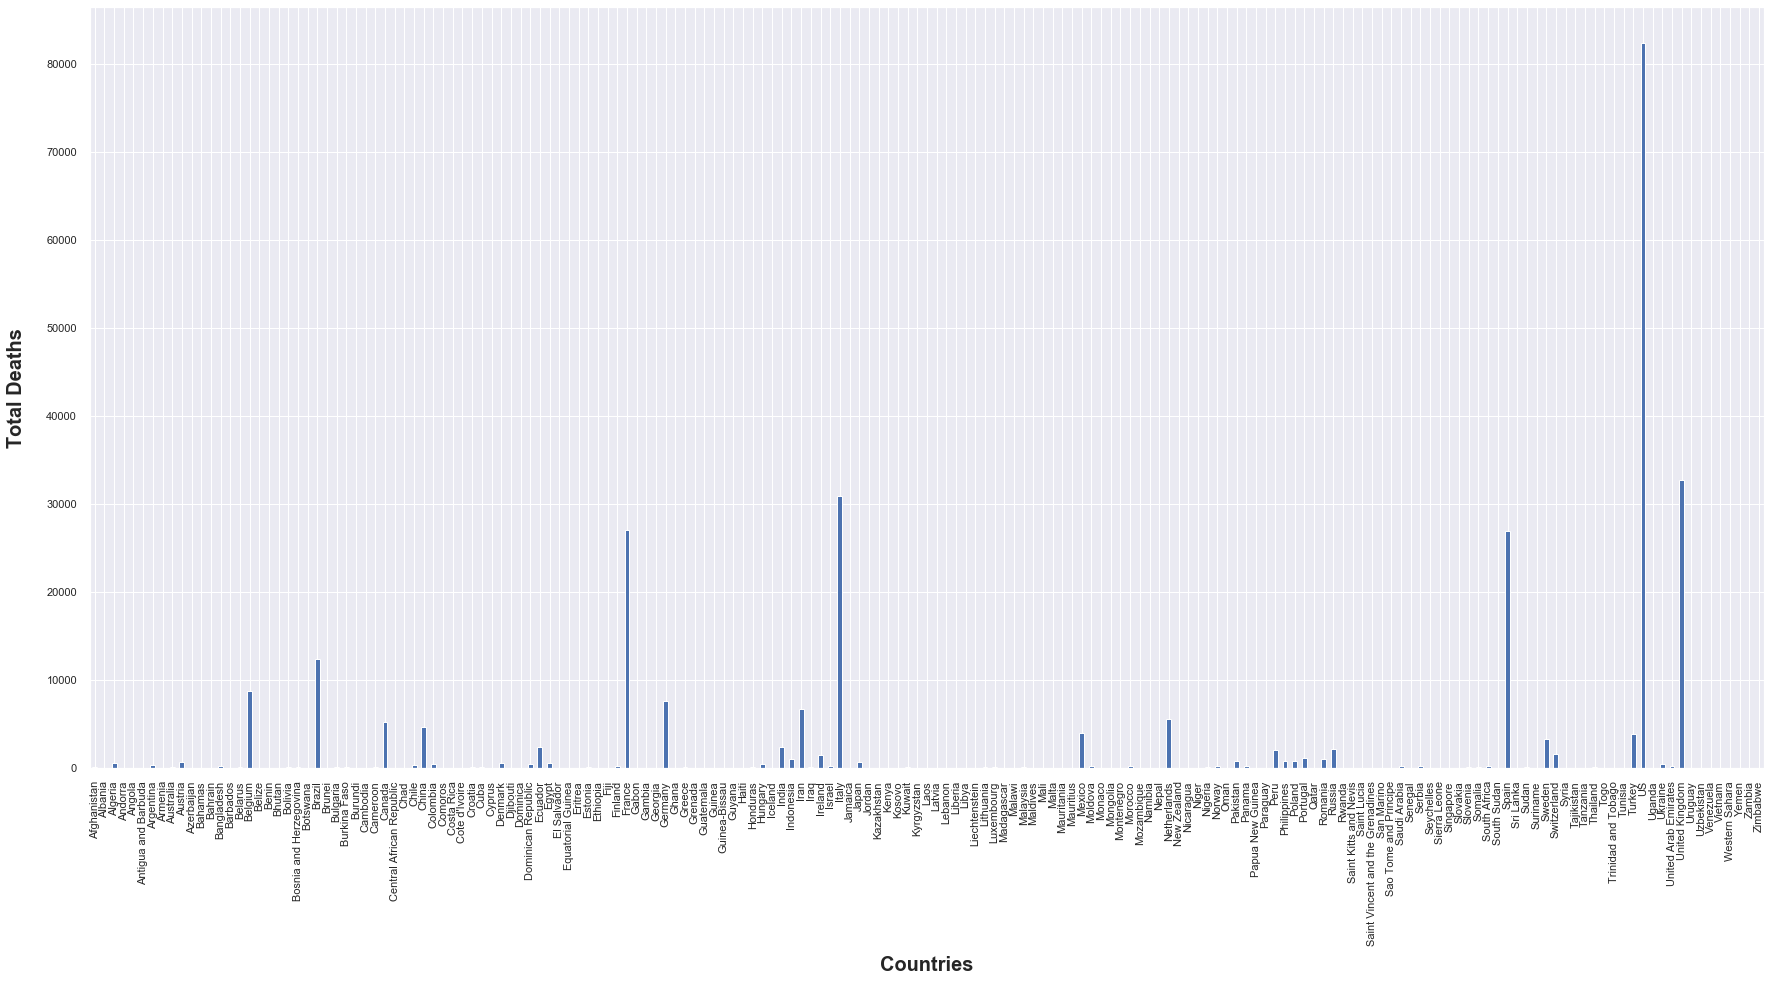

In [27]:
sns.set(font_scale=1)
deaths = merged['new_deaths'].plot.bar(figsize=(30,14), stacked=True, zorder=2)
plt.xlabel("Countries",labelpad=10, weight='bold', size=20)
plt.ylabel("Total Deaths", labelpad=20, weight='bold', size=20)

The above plot gives us an overall representation of the deaths ocrrued from Covid-19 of all the countries. From here we can narrow down the countries with significant amounts of death and create a subplot with the countries with maximum number of deaths to get a better visualisation.

In [28]:
major_deaths = merged.loc[['Brazil','China', 'Italy', 'United Kingdom', 'France', 'Spain', 'Turkey', 'Germany', 'Iran', 'Belgium','US'],['new_deaths']]
major_deaths

,new_deaths
Brazil,12400
China,4637
Italy,30911
United Kingdom,32692
France,26991
Spain,26920
Turkey,3894
Germany,7634
Iran,6733
Belgium,8761


Text(0, 0.5, 'Total Deaths')

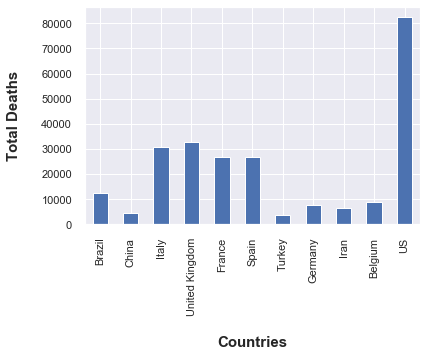

In [29]:
major_deaths_plot = major_deaths['new_deaths'].plot.bar(stacked=True, zorder=2)
plt.xlabel("Countries",labelpad=20, weight='bold', size=15)
plt.ylabel("Total Deaths", labelpad=20, weight='bold', size=15)

From the above bar graph, we can see that US has the highest number of deaths with the total amount being more than 80000.

### What are the Covid-19 Trends after Lockdown ? 
We will study only the 10 worst affected countries from Covid-19. And from these 10 countries we will predict the country with best lock down results. Country with least increase in number of cases and deaths will be considered as best.  

**First we will find the 10 worst affected countries using nlargest() function**

In [30]:
top_10 = merged.nlargest(10, columns=['new_deaths','new_cases'])

In [31]:
top_10 = top_10.iloc[:, :-20]
top_10.style.background_gradient(cmap='Reds')

Figuring out individual dates of lockdown for different countries, we now plot the graphs for the top 10 most effected countries individually with the green part of the plots representing the values of infecteds after the lockdown was implemented in that country.

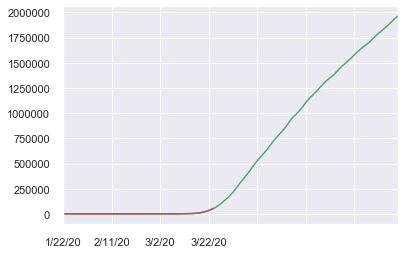

In [32]:
US = top_10.loc['US']
ax = US.plot(color='g')
US.loc[:'3/24/20'].plot(color='r', ax=ax)

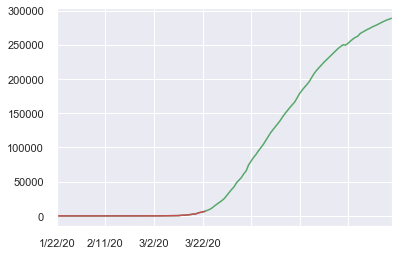

In [33]:
UK = top_10.loc['United Kingdom']
ax = UK.plot(color='g')
UK.loc[:'3/23/20'].plot(color='r', ax=ax)

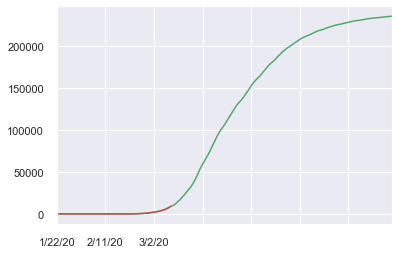

In [34]:
Ita = top_10.loc['Italy']
ax = Ita.plot(color='g')
Ita.loc[:'3/9/20'].plot(color='r', ax=ax)

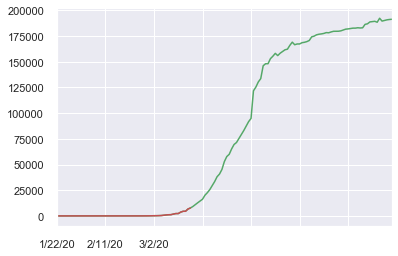

In [35]:
Fra = top_10.loc['France']
ax = Fra.plot(color='g')
Fra.loc[:'3/17/20'].plot(color='r', ax=ax)

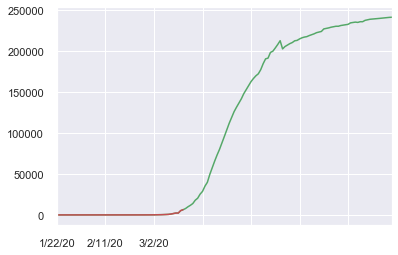

In [36]:
Spa = top_10.loc['Spain']
ax = Spa.plot(color='g')
Spa.loc[:'3/14/20'].plot(color='r', ax=ax)

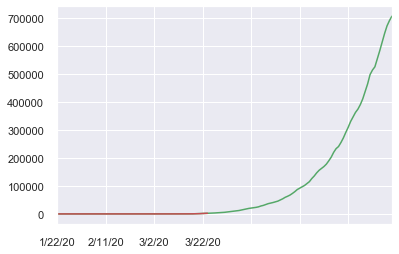

In [37]:
Bra = top_10.loc['Brazil']
ax = Bra.plot(color='g')
Bra.loc[:'3/24/20'].plot(color='r', ax=ax)

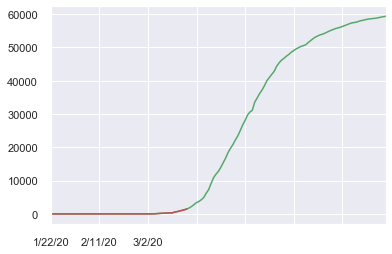

In [38]:
Bel = top_10.loc['Belgium']
ax = Bel.plot(color='g')
Bel.loc[:'3/18/20'].plot(color='r', ax=ax)

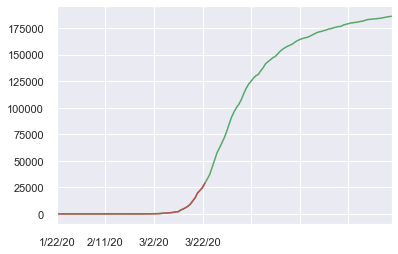

In [39]:
Ger = top_10.loc['Germany']
ax = Ger.plot(color='g')
Ger.loc[:'3/23/20'].plot(color='r', ax=ax)

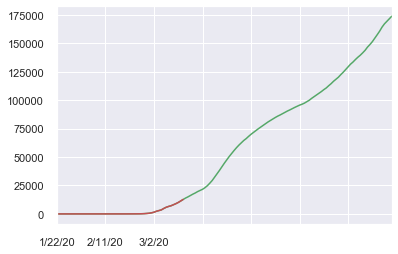

In [40]:
Ira = top_10.loc['Iran']
ax = Ira.plot(color='g')
Ira.loc[:'3/14/20'].plot(color='r', ax=ax)

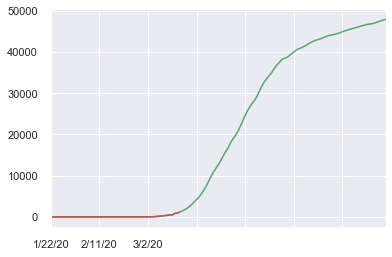

In [41]:
Ned = top_10.loc['Netherlands']
ax = Ned.plot(color='g')
Ned.loc[:'3/15/20'].plot(color='r', ax=ax)

It can be seen from the above graphs that only for Iran, the lockdown temporarily helped flatten the rise of infecteds for a little while. However, eventually for other uncontrollable factors, the numbers of infecteds started going up again. All the countries had an exponential rise in the number of infecteds, but Netherlands and Belgium has the lowest number of infecteds to date. So it can be assumed that the lockdown has paid off in these countries. Though, the reason can't can be concluded for sure.

## Spread of virus relating to International Travels

We will now try to find a correlation between the spread of the COVID-19 virus to the number of international arrivals to a country.

Firstly, we import a dataset for international arrivals according to individual countries.

In [42]:
travel_data = pd.read_csv('country_intl_arrival.csv')
travel_data.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,824000.00,869000.00,904000.0,979000.00,1072000.00,1225000.00,1102000.0,1070500.00,1082000.0,NaN
1,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,425000.00,481000.00,528000.0,650000.00,595000.00,592000.00,397000.0,261000.00,218000.0,NaN
3,Albania,ALB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,2191000.00,2469000.00,3156000.0,2857000.00,3341000.00,3784000.00,4070000.0,4643000.00,5340000.0,NaN
4,Andorra,AND,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1808000.00,2242000.00,2238000.0,2328000.00,2363000.00,2663000.00,2819000.0,3003000.00,3042000.0,NaN
5,Arab World,ARB,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,90023607.25,76660005.53,84844588.3,85114141.13,90876674.14,88169233.28,87721747.5,94181175.87,101463695.3,NaN
6,United Arab Emirates,ARE,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,16232000.00,17472000.00,18967000.0,20394000.00,21286000.0,NaN
7,Argentina,ARG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,6800000.00,6703000.00,6497000.0,6510000.00,7165000.00,6816000.00,6668000.0,6711000.00,6942000.0,NaN
8,Armenia,ARM,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,684000.00,758000.00,963000.0,1084000.00,1204000.00,1192000.00,1260000.0,1495000.00,1652000.0,NaN
9,American Samoa,ASM,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,23100.00,22600.00,22600.0,20800.00,21600.00,20300.00,20100.0,20000.00,20200.0,NaN


For the sake of simplification, we consider the number of arrivals at individual countries on 2018, which is the latest dataset available and get rid of all other columns.

In [43]:
travel_data = travel_data[['Country Name', '2018']]

Then we rename the columns.

In [44]:
travel_data.rename(columns={'2018': 'International Arrivals'}, inplace=True)
travel_data.set_index('Country Name', inplace=True)
travel_data.head()

,International Arrivals
Country Name,
Aruba,1082000.0
Afghanistan,NaN
Angola,218000.0
Albania,5340000.0
Andorra,3042000.0


In [45]:
travel_data.rename(index = {"United States": "US"},inplace = True) 

Then we take the latest number for the infecteds for individual countries from the grouped dataset.

In [46]:
latest_infecteds = grouped.iloc[ :, -1:]

In [47]:
latest_infecteds.head()

,6/8/20
Country/Region,
Afghanistan,20917
Albania,1263
Algeria,10265
Andorra,852
Angola,92


In [48]:
latest_infecteds.rename(columns = {list(latest_infecteds)[-1]: 'Latest Infecteds'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [49]:
latest_infecteds.head()

,Latest Infecteds
Country/Region,
Afghanistan,20917
Albania,1263
Algeria,10265
Andorra,852
Angola,92


Then we merge the dataframes so that we have an overall representation of infecteds and international arrivals according to individual countries.

In [50]:
merged_2 = pd.merge(travel_data, latest_infecteds, right_index=True, left_index=True)
merged_2.head(5)

,International Arrivals,Latest Infecteds
Afghanistan,NaN,20917
Angola,218000.0,92
Albania,5340000.0,1263
Andorra,3042000.0,852
United Arab Emirates,21286000.0,39376


In [51]:
merged_2 = merged_2.dropna(how='any', axis=0)

In [52]:
merged_2_sorted = merged_2.sort_values(["International Arrivals", "Latest Infecteds"], ascending = (False, True))
merged_2_sorted.style.background_gradient(cmap='Reds')

,International Arrivals,Latest Infecteds
France,8.9322e+07,191313
Spain,8.2773e+07,241717
US,7.97459e+07,1960897
China,6.29e+07,84195
Italy,6.15672e+07,235278
Turkey,4.5768e+07,171121
Mexico,4.1313e+07,120102
Germany,3.8881e+07,186109
Thailand,3.8178e+07,3119
United Kingdom,3.6316e+07,288834


We then take into account the data for the top 10 countries according to international arrivals.

In [53]:
top_10_travel = merged_2.nlargest(10, columns=['International Arrivals'])
top_10_travel.style.background_gradient(cmap='Reds')

,International Arrivals,Latest Infecteds
France,8.9322e+07,191313
Spain,8.2773e+07,241717
US,7.97459e+07,1960897
China,6.29e+07,84195
Italy,6.15672e+07,235278
Turkey,4.5768e+07,171121
Mexico,4.1313e+07,120102
Germany,3.8881e+07,186109
Thailand,3.8178e+07,3119
United Kingdom,3.6316e+07,288834


These are the countries with the lowest international arrivals.

In [54]:
lowest_10_travel = merged_2.nsmallest(10, columns=['International Arrivals'])

In [55]:
lowest_10_travel.style.background_gradient(cmap='Greens')

,International Arrivals,Latest Infecteds
Mali,14000,1547
Sao Tome and Principe,33400,513
Comoros,35900,141
Sierra Leone,57000,1001
Dominica,63000,18
Timor-Leste,75000,24
San Marino,84000,687
Liechtenstein,85300,82
Papua New Guinea,140000,8
Burkina Faso,144000,890


The top 10 countries respective to international travels, arranged in a descending order according to international travels in a bar graph.

Text(0, 0.5, 'Number of International Arrivals')

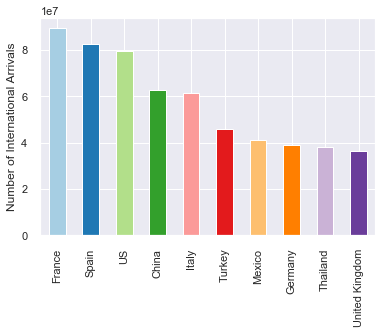

In [56]:
top_10_travel["International Arrivals"].sort_values(ascending=False).plot(kind='bar',grid = True, color=plt.cm.Paired(np.arange(len(top_10_travel))))

plt.ylabel("Number of International Arrivals")


The top 10 countries respective to international travels, arranged in a descending order according to the latest number of infecteds in a bar graph.

Text(0, 0.5, 'Number of Infecteds (latest)')

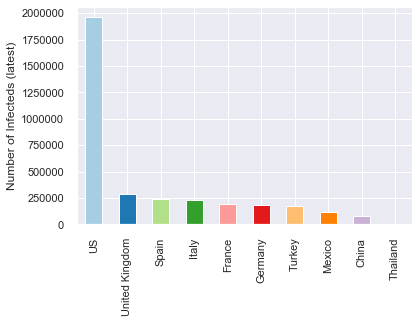

In [57]:
top_10_travel["Latest Infecteds"].sort_values(ascending=False).plot(kind='bar', grid = True, color=plt.cm.Paired(np.arange(len(top_10_travel))))
plt.ylabel("Number of Infecteds (latest)")

In [58]:
top_50_travel = merged_2.nlargest(50, columns=['International Arrivals'])
top_50_infected = merged_2.nlargest(50, columns=['Latest Infecteds'])

Text(0, 0.5, 'Infecteds')

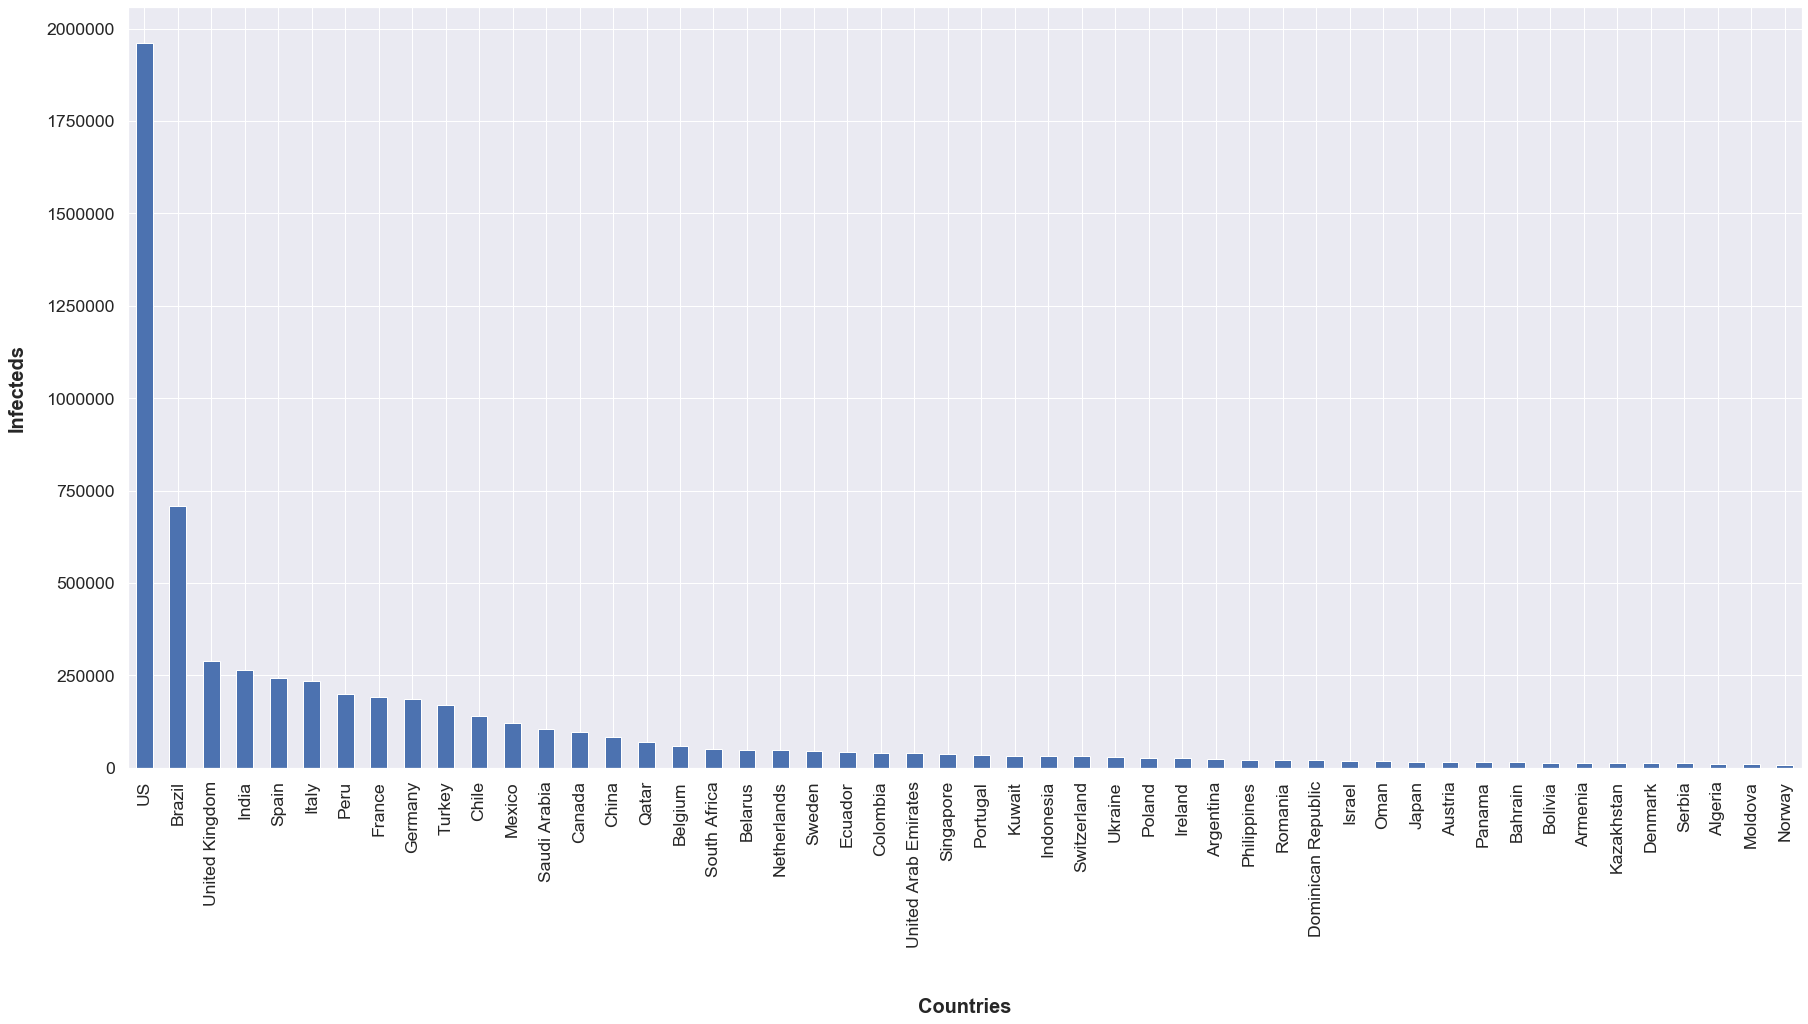

In [59]:
sns.set(font_scale=1.6)
infecteds = top_50_infected['Latest Infecteds'].sort_values(ascending=False).plot.bar(figsize=(30,14), stacked=True, zorder=2)
plt.xlabel("Countries",fontsize=50, labelpad=50, weight='bold', size=20)
plt.ylabel("Infecteds", labelpad=20, weight='bold', size=20)

Text(0, 0.5, 'International Arrivals')

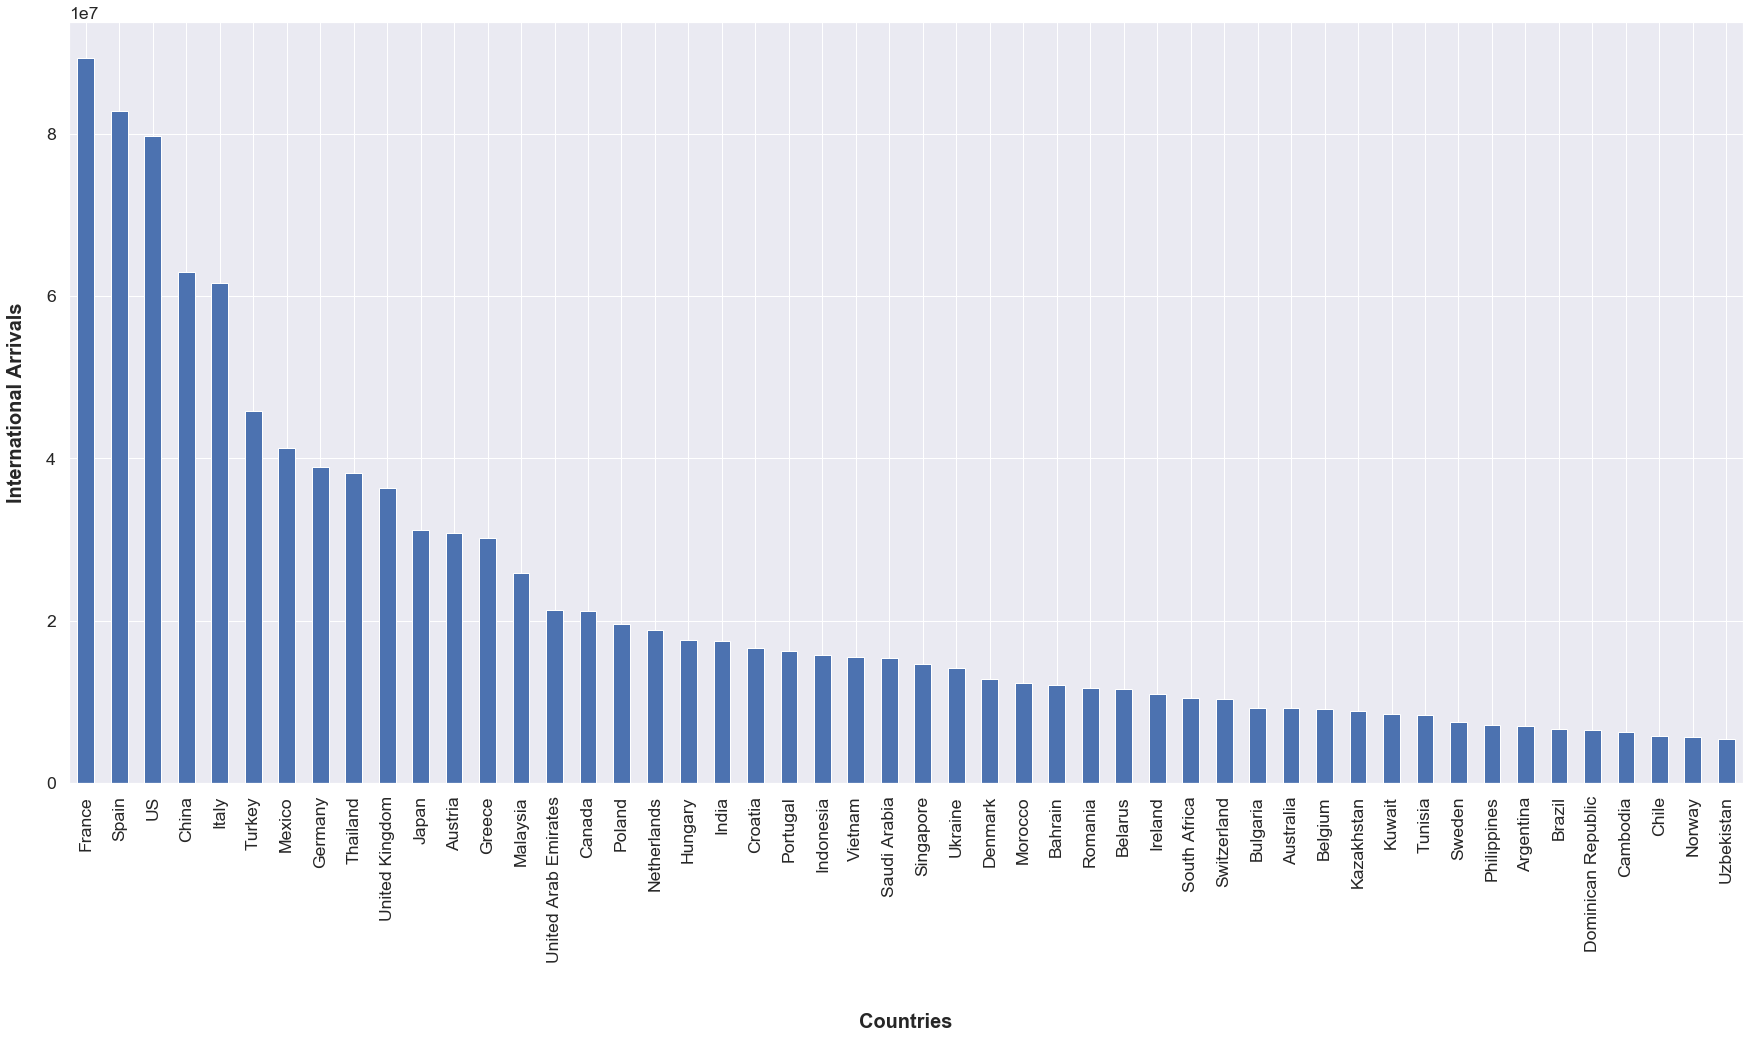

In [60]:
travel = top_50_travel['International Arrivals'].sort_values(ascending=False).plot.bar(figsize=(30,14), stacked=True, zorder=2)
plt.xlabel("Countries",fontsize=50, labelpad=50, weight='bold', size=20)
plt.ylabel("International Arrivals", labelpad=20, weight='bold', size=20)

From the above plots we can see that, among the 50 countries chosen with the maximum numbers of international arrivals, most of them are common with the 50 countries having maximum numbers of infecteds. This also gives a clue that there is a positive correlation between international arrivals and the risk of COVID-19 spread in a country.

In [61]:
merged_2.rename(columns = {list(merged_2)[-1]: 'Latest_Infecteds'}, inplace = True)
merged_2

,International Arrivals,Latest_Infecteds
Angola,218000.0,92
Albania,5340000.0,1263
Andorra,3042000.0,852
United Arab Emirates,21286000.0,39376
Argentina,6942000.0,23620
...,...,...
Uzbekistan,5346000.0,4440
Vietnam,15498000.0,332
South Africa,10472000.0,50879
Zambia,1072000.0,1200


In [62]:
merged_2.rename(columns = {list(merged_2)[-2]: 'International_Arrivals'}, inplace = True)

In [63]:
## here just merge the both datasets.
merged_2.index.nunique() 
#Only Countries names will be common in both datasets. Just use dataset of 10 worst countries and 10 most travelled. /
rank_corr = spearmanr(merged_2.International_Arrivals.values, merged_2.Latest_Infecteds.values)
rank_corr

SpearmanrResult(correlation=0.7299509669527019, pvalue=2.1235838292842174e-23)

From the above calculation of the Spearman rank-order correlation coefficient, we can see a positive correlation of 0.73 (within a scale of -1 to +1) between the number of international arrivals to a country and the number of infecteds in that country. This means that the greater the number of international arrivals to a country, the greater the risk of that country of having more infecteds.

## Creating a simple Predictive Model

It is well understood that the spread of the virus follows an exponential pattern. This is because each infected person infects more than one new person on average, leading to exponential growth.  This is why the key to stopping the growth of the pandemic is to reduce the number of people infected by stopping contact and isolating infected poeple. 

An exponential curve has the equation $y = e^{mx}$. It can be converted to a linear relationship by taking the logarithm of each side: $log(y) = mx$.  This means that we can fit a linear regression model to the data as long as we take the log of the number of cases. 

We will select the data for USA as it has a clear exponential curve and build a linear regression model to predict the log of the number of case. Then I would test how well the model fits the data. 

In [78]:
transposed_data=grouped.transpose()

final_data = transposed_data.rename(columns={'Country/Region': 'Dates'})
final_data.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [79]:
regression_us = final_data['US']
logged_us = np.log(regression_us)
logged_us_df = pd.DataFrame(logged_us)
logged_us_df

,US
1/22/20,0.000000
1/23/20,0.000000
1/24/20,0.693147
1/25/20,0.693147
1/26/20,1.609438
...,...
6/4/20,14.442870
6/5/20,14.455985
6/6/20,14.467868
6/7/20,14.480077


In [80]:
logged_us_df['Day'] = range(len(logged_us_df))
logged_us_df

,US,Day
1/22/20,0.000000,0
1/23/20,0.000000,1
1/24/20,0.693147,2
1/25/20,0.693147,3
1/26/20,1.609438,4
...,...,...
6/4/20,14.442870,134
6/5/20,14.455985,135
6/6/20,14.467868,136
6/7/20,14.480077,137


In [81]:
reg = linear_model.LinearRegression()
X = logged_us_df[['Day']]
y = logged_us_df['US']
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
predicted_us = reg.predict(logged_us_df[['Day']])
predicted_us

array([ 1.20880277,  1.32782353,  1.44684429,  1.56586505,  1.68488581,
        1.80390657,  1.92292733,  2.0419481 ,  2.16096886,  2.27998962,
        2.39901038,  2.51803114,  2.6370519 ,  2.75607266,  2.87509342,
        2.99411418,  3.11313494,  3.2321557 ,  3.35117646,  3.47019722,
        3.58921798,  3.70823874,  3.8272595 ,  3.94628026,  4.06530102,
        4.18432178,  4.30334254,  4.4223633 ,  4.54138406,  4.66040482,
        4.77942558,  4.89844634,  5.0174671 ,  5.13648786,  5.25550862,
        5.37452938,  5.49355014,  5.6125709 ,  5.73159166,  5.85061242,
        5.96963318,  6.08865394,  6.2076747 ,  6.32669546,  6.44571622,
        6.56473698,  6.68375774,  6.8027785 ,  6.92179926,  7.04082002,
        7.15984078,  7.27886155,  7.39788231,  7.51690307,  7.63592383,
        7.75494459,  7.87396535,  7.99298611,  8.11200687,  8.23102763,
        8.35004839,  8.46906915,  8.58808991,  8.70711067,  8.82613143,
        8.94515219,  9.06417295,  9.18319371,  9.30221447,  9.42

In [83]:
r2 = r2_score(y, predicted_us)
r2

0.8919228357805541

The R-squared value for the model is quite high (around 89%). This shows that the model fits the data for USA very well as it has an exponential growth.

In [84]:
17.63366769**10

2906876103147.8257

### Summary

From the model, we can predict that if USA doesn't take drastic measures and come up with some sort of control to limit their spread of the COVID-19 virus, the numbers of infected in their country could eventually reach upto 2906876103147 (which is more than the population of USA, but it's just a simple prediction).